# 머신러닝>지도학습>분류>성능평가지표

- 통계학의 혼동행렬이라는 항목을 이용하여 평가
- 예측값이 실제 관측값을 얼마나 정확하게 예측하였는지, 이것을 보여주는 행렬
  - 암을 예측하였는데, 실제로 양성이였는가? 음성이였는가?



# 혼동행렬(오차행렬)

- 예측이 참: Positive => P
- 예측이 거짓 : Nagative => N
- 예측과 실제가 동일하면 : True => T
- 예측과 실제가 다르면 : False => F

- TP 상황
  - 병이 있다고 예측하였는데, 실제로 병이 있었다.
  - TP (긍정한 것이 참이 되었다)

- TN 상황
  - 병이 없다고 예측하였는데, 실제로 병이 없었다.
  - TN (부정한 것이 참이 되었다)

- FP 상황
  - 병이 있다고 예측하였는데, 실제로 병이 없었다.
  - FP (긍정한 것이 거짓이 되었다)
  - 1형 오류

- FN 상황
  - 병이 없다고 예측하였는데, 실제로 병이 있었다.
  - FN (부정한 것이 거짓이 되었다)
  - 2형 오류

- 정밀도(P:Precision)
  - 병이 있다고 예측을 했는데, 실제로 병이 있는 비율, 정답율
  - TP / (TP + FP)

- 재현율(R:Recall, 민감도, 참긍정율)
  - 실제 병이 있는 전체 데이터중, 참 긍정 비율
  - TP / (TP + FN)

- F1 점수
  - 정밀도와 재현율의 조화평균
  - F1 = 2 / (1/P + 1/R)

- 특이점
  - 실제 병이 없는 전체 데이터 중에 예측이 참 부정의 비율
  - TN / (TN + FP)

- 곡선하 면적(ROC: Area under curve), AUC
  - 참 긍정비율과 거짓 긍정비율 사이를 기술/표현한다.
  - 1 - 특이성

# 다중 클래스에서 클래스 전체 평균 산출법
- 레포트를 내면 알아서 결과를 내준다. => 의미를 알고 있자  
<br>
- ***클래스*** = 레이블 = 종속변수
- 속성 = 피쳐 = 독립변수

- 마이크로 평균
  - 모든 클래스의 결과를 합쳐서 전체를 평가한다.
  - 예를 들어서 클래스가 3개가 있다.
  - 정밀도 = (TP1 + TP2 + TP3) / (TP1 + FP1 + ... + FP3)

- 매크로 평균
  - 전체 성능의 양상을 알기 위해서 사용한다.
  - 정밀도 = (개별 정밀도1 + 개별 정밀도2 + ...)/3(클래스의 수)

# AUC, ROC 커브

In [0]:
from matplotlib import pyplot as plt

In [0]:
from sklearn.datasets import load_iris
import pandas as pd

- 1. 연구목표 : ROC, AUC 표현
- 2. 데이터획득 : sklearn의 load계열 함수를 이용하여 iris 데이터 획득
- 3. 데이터준비 : iris 데이터를 dataFrame으로 획득하라
- 4. 데이터분석 : 생략
- 5. 모델링구출 : 여러 개의 알고리즘을 이용하여 구성할 것

In [0]:
# 아이리스 데이터 로드하여 df로 구성
tmp = load_iris()

In [82]:
type(tmp) # Bunch 타입

sklearn.utils.Bunch

In [83]:
tmp.data.shape, tmp.target.shape  # 목표는 (150, 5)

((150, 4), (150,))

In [84]:
# 데이터와 칼럼명을 부여하여 생성
df = pd.DataFrame( tmp.data, columns=tmp.feature_names )
# 현재 데이터프레임은 (150, 4)이므로 타겟 칼럼 추가해야한다.
df.shape

(150, 4)

In [85]:
# 칼럼 추가
df['species'] = tmp.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


## 0. 모듈 가져오기

In [0]:
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [0]:
# 알고리즘들
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [89]:
# 2. 데이터 준비(df) => 훈련용, 테스트용 데이터 준비!!
# 독립변수 데이터만 구하시오 => (150, 4)
# DataFrame으로 나와야 한다.
X = df.iloc[:, :4]
X = df[ df.columns[:-1]]
X.head(2)

# 필요한 열만 자른다 => 열 인덱싱
# 필요한 행만 자른다 => 행 슬라이싱
# 필요한 행과 열이 정해진다 => loc OR iloc
#   - 행이 연속적, loc
#   - 행이 불연속, iloc

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [0]:
# 종속 변수 데디터만 구하시오 => (150, 1) or (150, )
# Series로 나와야 한다. -> 차원축소 -> 인덱싱
Y = df[ df.columns[-1] ]

In [107]:
tmp.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
# roc_curve error : ValueError: multiclass format is not supported
# Y_test와 pred의 타입이 달라서로 추정
# Y_test -> 'versicolor'이냐 아니냐 => 이진 데이터로 바꿔주자
Y = df[ df.columns[-1] ] == 1

In [0]:
# 훈련용, 테스트용 데이터 준비!!
# 0.8은 실험적인 극단적인 상황(테스트가 더 많다)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

In [111]:
X_train.shape, X_test.shape, X_train.shape[0]*4
# 비율 확인용 코드

((30, 4), (120, 4), 120)

## 훈련(학습) => 평가 (비교할 수 있게 시각화로)

- ROC커브로 드로잉(선형차트)

In [0]:
# 1. 시각화를 위해서 준비, 알고리즘 생성
class_map = {
    'LogisticRegression'     :('-', LogisticRegression()),
    'DecisionTreeClassifier' :('--', DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier' :('.-', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    'GaussianNB'             :(':', GaussianNB())
}

In [0]:
# 차트의 모양
plt.figure(figsize=(10,10))
# 키값, 선형차트의 선모양, 알고리즘 <= 반복
for key, (line_style, model) in class_map.items():
  # 1. 훈련(학습) : 20%
  model.fit(X_train, Y_train)
  # 2. 예측 : 80%
  # predict_proba => 예측확률이 높은쪽으로 정답을 정한다. ( 과반 )
  predict = model.predict_proba(X_test)
  pred = pd.Series(predict[:, 1]) # 팬시 인덱싱
  # print(type(Y_test))
  # break
  # 실제로 할거면, 각 행별로 확률이 높은 값으로 선택, 여기서는 1번으로 하겠다.

  # 확인용
  # print('='*50)
  # print(type(predict)) # <class 'numpy.ndarray'> # target label이 3개!!
  # print('='*50)

  # 3. ROC 커브 드로잉
  # fpr : 거짓 양성 비율
  # tpr : 참 양성 비율
  # _ : 임계값 (더미처리), fpr, tpr 계산시 사용한 임계값
  fpr, tpr, _ = roc_curve(Y_test, pred)
  # 그린다!!
  plt.plot(fpr, tpr, line_style, linewidth=3, label=key)
  # 4. auc 값 출력 (print로)
  print(key, auc(fpr, tpr))


# 범례
plt.legend()
# 기준 가이드선(1차함수, 기울기=1)
plt.plot([0,1],[0,1], 'k--')
# x,y 라벨
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 화면에 보여라
plt.show()

- 최종 반복 코드

In [0]:
# 0:'setosa', 1:'versicolor', 2:'virginica'
CLASS_TYPE = 1 # 0 or 1 or 2
X = df[ df.columns[:-1]]
Y = df[ df.columns[-1]] == CLASS_TYPE
# Y => 참과 거짓 ( 이진분류 => 답은 참 x%, 거짓 y%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

LogisticRegression 0.7307692307692307
DecisionTreeClassifier 0.8974358974358976
RandomForestClassifier 0.9664224664224665
GaussianNB 0.9752747252747253


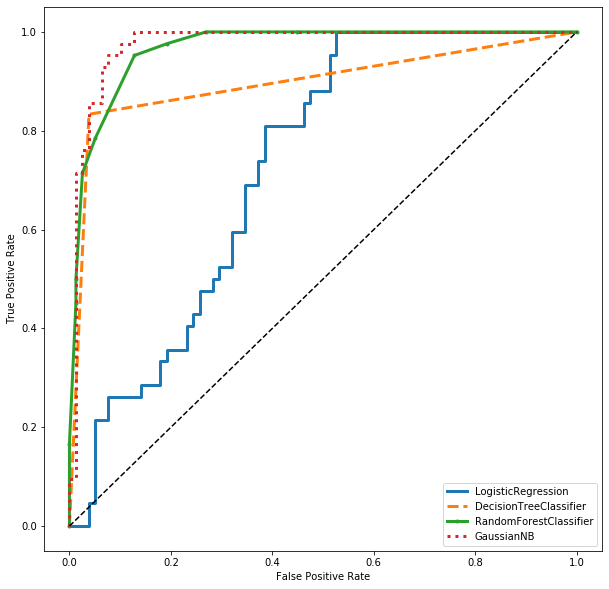

In [133]:
plt.figure(figsize=(10,10))
for key, (line_style, model) in class_map.items():
  model.fit(X_train, Y_train)
  predict = model.predict_proba(X_test)
  pred = pd.Series(predict[:, 1])
  fpr, tpr, _ = roc_curve(Y_test, pred)
  plt.plot(fpr, tpr, line_style, linewidth=3, label=key)
  print(key, auc(fpr, tpr))

plt.legend()
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# ROC 커브는 그 면적이 1에 가까울수록 (즉 왼쪽위 꼭지점에 다가갈수록) 좋은 성능이다. 그리고 이 면적은 항상 0.5~1의 범위를 갖는다.(0.5이면 랜덤에 가까운 성능, 1이면 최고의 성능)
# AUC가 아래의 면적을 수치화 한것